<center>
<div class="alert alert-block alert-info">
    <h1>Clean and Analyse Data for Online Store</h1> 
</div>

---

### This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts and many customers of the company are wholesalers.

### This data set has been acquired from the UCI Machine Learning Repository and was made available by Dr Daqing Chen. It is also available on Kaggle.

---

<center>
<div class="alert alert-block alert-warning text-style:bold;>
    <h1>Table of Contents</h1> 
</div>

<a id='top'></a>
* [Importing Libraries](#import_libraries)
* [Importing Data](#importing_data)  
* [Creating the Data Frame](#create_dataframe)
* [Data Cleaning](#data_cleaning)  
    - [Missing Values](#missing_values)
    - [Price](#prices)
    - [Quantity](#quantity)
    - [Stock Code](#stockcode)
    - [Missing Customer ID](#missing_customerid)
    - [description](#description)
    - [Customers](#customers)
* [Feature Engineering](#feature_engineering)
* [Save Dataframe](#save_file)
* [Summary](#summary)
    

<a id="import_libraries"></a>

<center>
<div class="alert alert-block alert-warning"; text-style:bold;>
    <h1>Importing Libraries</h1> 
</div>

In [20]:

#import pandas, numpy, stats to investigate outliers

import pandas as pd
import numpy as np
from scipy import stats 
import datetime
#for visualization import matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os

In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<a id="importing_data"></a>
<center>
<div class="alert alert-block alert-warning">
    <h1>Importing Data</h1> 
</div>

In [22]:
print(os.listdir('../'))

['cleaned_data', 'capstone_3.rtf', 'data_analysis', '.DS_Store', 'data modeling', 'data_wrangling', 'raw_data', 'project_3_ideas.rtf']


In [23]:
#print(os.listdir('~/Users/Rime/Documents/Springboard_docs/springboard/capstone_3'))

In [24]:
#importing data which is an excel file
#create an excel object so I can see the sheets
data_excel = pd.ExcelFile('../raw_data/online_retail/online_retail_II.xlsx')
#read sheets
data_excel.sheet_names

['Year 2009-2010', 'Year 2010-2011']

In [25]:
#create the data
data = pd.read_excel('../raw_data/online_retail/online_retail_II.xlsx',sheet_name=[0,1])
type(data)

dict

>This is a dictionary with the keys as the sheet names.

In [26]:
#size of each sheet
len(data[0]),len(data[1])

(525461, 541910)

In [27]:
#display the first few rows of each sheet
data[0][:10]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [28]:
data[1][:10]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


<a id="create_dataframe"></a>
<center>
<div class="alert alert-block alert-warning">
    <h1>Create Data Frame</h1> 
</div>



>To create a data frame out of the values of the dictionary ignoring the index, I need to concatenate the two sheets

In [29]:
df= pd.concat(data.values(),ignore_index=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [30]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [31]:
#Notice some description is upper case
df.shape

(1067371, 8)

In [32]:
#check if the number of rows is correct
len(data[0])+len(data[1])

1067371

>The data frame has the right number of rows and columns

<a id="data_cleaning"></a>
<center>
<div class="alert alert-block alert-warning"; text-style:bold;>
    <h1>Data cleaning</h1> 
</div>

In [33]:
#check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [34]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


<a id="missing_values"></a>
### Missing values

In [35]:
#check if there are missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

>There are 4382 item description missing, but what is more concerning is that there are 243007 customer id missing. How can someone order an item from the store with no id. This needs to investigated further.

### Investigate Countries

In [36]:
df['Country'].value_counts()

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

>Most common is UK, what is the percentage

In [37]:
df.loc[df['Country']=='United Kingdom'].shape[0] / df.shape[0] *100

91.93897904290074

''

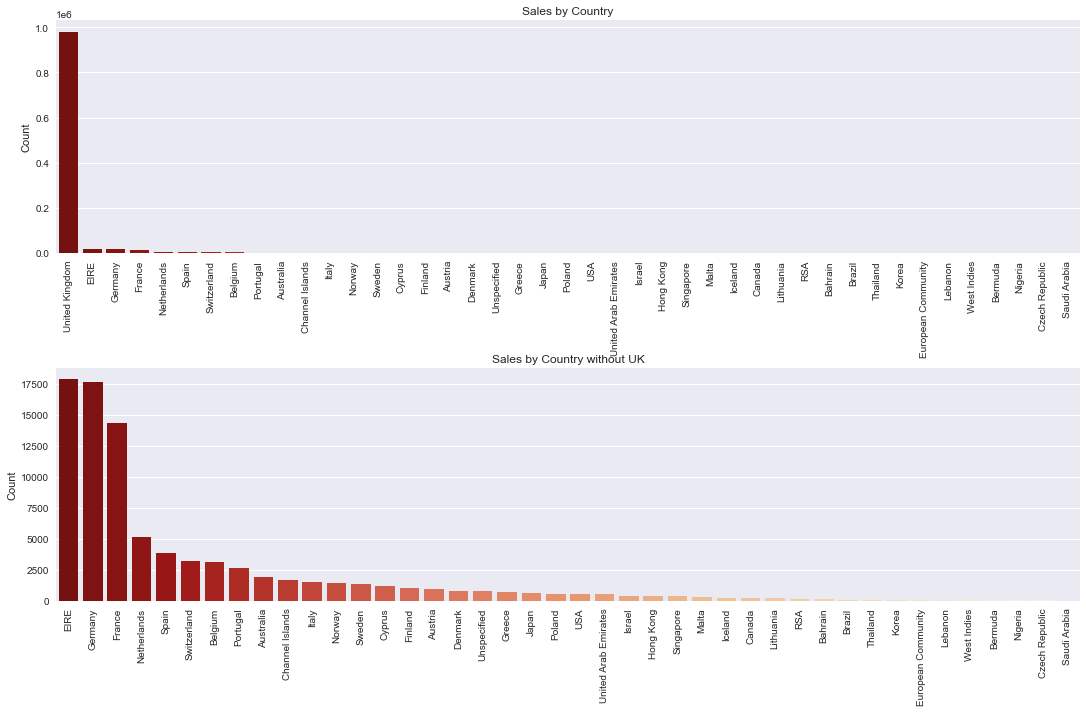

In [38]:
plt.style.use('seaborn')
#sales for top 10 countries
countries = df[df.Country.notna()]['Country'].value_counts(ascending=False)

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.barplot(countries.index,countries.values,palette='OrRd_r')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Sales by Country')

#remove UK to see sales for other countries

plt.subplot(2,1,2)
sns.barplot(countries.index[1:],countries.values[1:],palette='OrRd_r')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('Count')
plt.title('Sales by Country without UK')
;



>* EIRE is Ireland but European Community is an expression that was used before the European union
>* RSA is the Republic of South Africa  
>* Since the data is for an online UK store, it makes sense that most orders were from UK

___

[Back To Top](#top)

<a id="prices"></a>
### Investigate Price


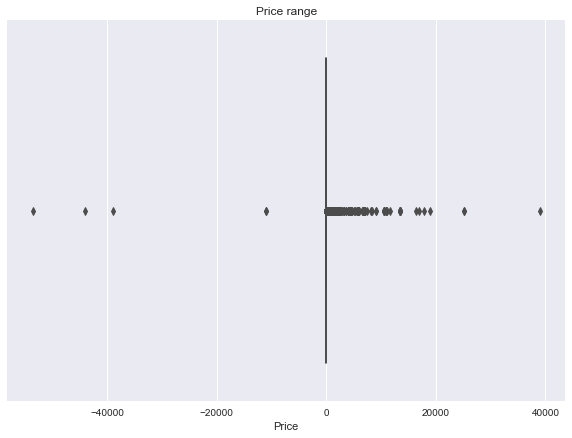

In [39]:
plt.style.use('seaborn')
plt.subplots(figsize=(10,7))
sns.boxplot(x='Price',data=df)
plt.title('Price range');

> There are negative prices which could mean returns, needs investigation

In [40]:
#print rows that have negative prices
df[df.Price<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [41]:
df.loc[df.Description=='Adjust bad debt']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


>All are adjust bad debt. There is one more entry in the data with this description which is 11062.06, which is subtracted twice later. I think all these adjusted bad debt should be deleted because they are not a product and their customers are nans. But first investigate if these invoices occur anywhere else in the dataset

In [42]:
#see if these invoices repeat any where in the data set
invoices = df.Invoice.loc[df.Description=='Adjust bad debt'].values
df.loc[df.Invoice.isin(invoices)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [43]:
#delete these rows
idx = df[df.Invoice.isin(invoices)].index
df_fixed = df.drop(idx)

In [44]:
#check they are deleted
df_fixed.loc[df.Invoice.isin(invoices)]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


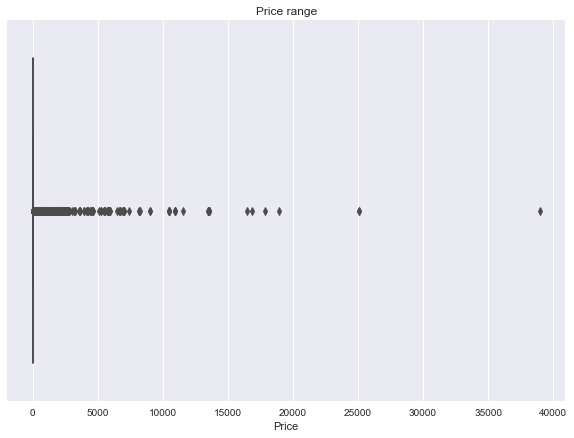

In [45]:
#plot prices now
plt.style.use('seaborn')
plt.subplots(figsize=(10,7))
sns.boxplot(x='Price',data=df_fixed)
plt.title('Price range');

In [46]:
#investigating min and max price values
df_fixed.Price.max(),df.Price.loc[df.Price>=0].min()

(38970.0, 0.0)

>Positive prices range from 0 to 38970, but there are some prices at 0. Next look at rows with price equal 0

In [47]:
#create a dataframe with only the zero prices called zero_price
print('count of 0 price = ',df_fixed.Price.loc[df.Price==0].count())
zero_price = df_fixed.loc[df.Price==0]
zero_price

count of 0 price =  6202


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1064015,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [48]:
#which customers have 0 price and are nans
(zero_price['Customer ID'].loc[df.Price==0]).isna().sum()


6131

>6131 rows that have zero for price also have nan for customer ID, 71 customers are not nan who got a price of 0. I notice also that there are negative quantities. Next look at the description and negative quantity. I will investigate this further later.

___

[Back To Top](#top)

<a id ='quantity'></a>
### Quantity

>Look at the cutomers with 0 price who have an id

In [49]:

zero_price[zero_price['Customer ID'].notna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
...,...,...,...,...,...,...,...,...
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602.0,United Kingdom
1005014,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603.0,Germany
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444.0,Norway
1011446,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom


>These seem to be promotions, gifts or manuals, so they should not be dropped. 

In [50]:
zero_price[zero_price.Quantity<0].count()




Invoice        3457
StockCode      3457
Description     768
Quantity       3457
InvoiceDate    3457
Price          3457
Customer ID       0
Country        3457
dtype: int64

In [51]:
#are all the customers unknown for negative quantity?
zero_price[zero_price.Quantity<0]['Customer ID'].isna().sum()


3457

>There are 3457 rows with negative quantity and all the customers are unknown. Investigate their description

In [52]:
pd.set_option("display.max_rows", None)
print('# of unique descroptions= ',zero_price.Description[zero_price.Quantity<0].nunique())
zero_price.Description[zero_price.Quantity<0].value_counts()

# of unique descroptions=  222


check                                  123
damages                                 84
?                                       83
damaged                                 78
missing                                 27
sold as set on dotcom                   20
Damaged                                 17
Unsaleable, destroyed.                   9
smashed                                  9
thrown away                              9
dotcom                                   8
damages?                                 7
??                                       7
crushed                                  6
given away                               6
counted                                  5
ebay                                     5
Damages                                  5
MIA                                      5
checked                                  5
wet damaged                              5
Dotcom sales                             4
ebay sales                               4
No Stock   

>All Products were returned because some sort of damage, so with customer id missing and no price and negative quantity, we can conclude that these products were damaged and so are not considered sales and we can safely drop them.

In [53]:
#drop rows with negative quantity and nan customer ID
idx= zero_price[zero_price.Quantity<0].index
df_fixed = df_fixed.drop(idx)
df_fixed.shape

(1063908, 8)

<AxesSubplot:xlabel='Quantity'>

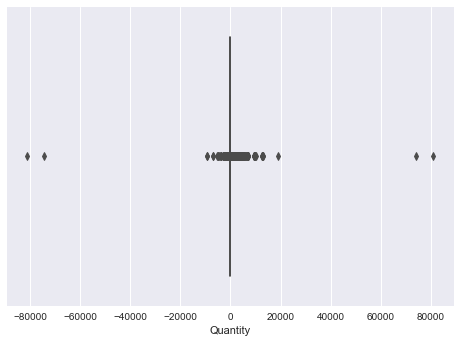

In [54]:
sns.boxplot(df_fixed.Quantity)

>There still many negative quantity so this needs further investigation. There is also something weird about the quantity. There are two outliers in the negative and positive sides that seem to be equivalent. I wonder if these are mistakes that were deleted. So I will sort the dataframe by the quantity

In [55]:
#sort descending
df_fixed.sort_values('Quantity',ascending=False)[:5]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark


In [56]:
#sort ascending
df_fixed.sort_values('Quantity',ascending=True)[:10]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,2010-09-28 11:02:00,0.07,14277.0,France
359658,C524235,16046,TEATIME PEN CASE & PENS,-4608,2010-09-28 11:02:00,0.08,14277.0,France


In [57]:
df_fixed[df_fixed.Quantity==7008]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
298941,518505,21096,SET/6 FRUIT SALAD PAPER PLATES,7008,2010-08-09 13:10:00,0.13,14277.0,France
358763,524174,21096,SET/6 FRUIT SALAD PAPER PLATES,7008,2010-09-27 16:30:00,0.13,13687.0,United Kingdom


>If I look at the sixth row there was an order made by the same customer and then canceled, meaning there was a mistake where a large order was made and then canceled. Does this mean that all the negative quantities have equivalent positive orders that cancels them. To find out I will test the theory that they are the same order canceled. Also I notice that the invoice starts with a c. Also the canceled orders have the same customer id and description

In [58]:
#dataframe with all invoices that start with a C
c_invoice = df_fixed[df_fixed.Invoice.str.startswith('C',na=False)]
c_invoice.shape

(19494, 8)

In [59]:
#check if all invoices that start with c are negative quantity
(c_invoice.Quantity<0).sum()
c_invoice[c_invoice.Quantity>0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,NaN,United Kingdom


>This is a weird entry, it is the only entry where invoice start with a C and it is positive quantity. I am going to delete it.

In [60]:
df_fixed = df_fixed.drop(76799)
df_fixed[df_fixed.Invoice=='C496350']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


___

>Before investigating this any further, I will strip the date from InvoiceDate and make it into a datetime object

In [61]:
df_fixed['Date'] = df_fixed.InvoiceDate.apply(lambda x: x.strftime('%Y/%m/%d'))
df_fixed['Date'] = pd.to_datetime(df_fixed['Date'])
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063907 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1063907 non-null  object        
 1   StockCode    1063907 non-null  object        
 2   Description  1062214 non-null  object        
 3   Quantity     1063907 non-null  int64         
 4   InvoiceDate  1063907 non-null  datetime64[ns]
 5   Price        1063907 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1063907 non-null  object        
 8   Date         1063907 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 81.2+ MB


___

>check that items with positive quantities do not have an invoice beginning with C.


In [65]:
#create dataframe with positive quantities 
pos_quantity=df_fixed[df_fixed.Quantity>0]
#make sure no positve quantity entry has an invoice that starts with c
(pos_quantity.Invoice.astype(str).str.startswith('C',na=False)).sum()

0

>All negative quantity transactions have an invoice that starts with C which I am guessing means credit. Next I will check if the negative transactions have a positive transaction that is opposite and which cancels them. I will do this by merging the pos_quantity and neg_quantity dataframes using inner merge, so it will only keep rows in common between the two.


In [66]:
#crate a dataframe with negative quantity
neg_quantity = df_fixed[df_fixed.Quantity<0]
 


In [67]:
neg_quantity[:5]
neg_quantity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19493 entries, 178 to 1067178
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      19493 non-null  object        
 1   StockCode    19493 non-null  object        
 2   Description  19493 non-null  object        
 3   Quantity     19493 non-null  int64         
 4   InvoiceDate  19493 non-null  datetime64[ns]
 5   Price        19493 non-null  float64       
 6   Customer ID  18744 non-null  float64       
 7   Country      19493 non-null  object        
 8   Date         19493 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 1.5+ MB


In [68]:
pos_quantity[(pos_quantity.StockCode == '72800D') & (pos_quantity.Quantity == 1)& (pos_quantity['Customer ID']== 15581.0) & (pos_quantity.Country == 'United Kingdom')]




,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
43706,493188,72800D,S/4 BLUE DINNER CANDLE SILVER FLOCK,1,2009-12-22 12:38:00,2.55,15581.0,United Kingdom,2009-12-22
43710,493188,72800D,S/4 BLUE DINNER CANDLE SILVER FLOCK,1,2009-12-22 12:38:00,2.55,15581.0,United Kingdom,2009-12-22


>There are duplicates in the dataframe where some ordered more than once then canceled, so I need to cancel the orders that were canceled.

In [79]:
"""
Function that takes 
        the negative quantity and positive quantity dataframes and the columns to check on, 
        iterate through dataframe rows and match on stockcode, quantity, customer id and country
        drop the row from df of negative quantity
returns 
    the indices of first matching row. It also deletes the matched row from the neg_quantity df"""
def find_duplicate_rows(neg_df,pos_df,stockcode,quantity,customerid,country):
    matches = []
    for indx,row in neg_df.iterrows():
        df_stockcode = pos_df[pos_df[stockcode]==row[stockcode]]
        df_stockcode = df_stockcode[df_stockcode[quantity].abs()==abs(row[quantity])]
        df_stockcode = df_stockcode[(df_stockcode[customerid] == row[customerid]) & (df_stockcode[country] == row[country])]
        if df_stockcode.empty==False:
            neg_df = neg_df.drop(indx)
            matches.append(df_stockcode[0:1].index.tolist())
    ind = [x for l in matches for x in l]#since matches returns a list of lists, iterate through to get a list of indices
    return ind,neg_df


In [80]:
ind,neg_df = find_duplicate_rows(neg_quantity,pos_quantity,'StockCode','Quantity','Customer ID','Country')
len(ind),neg_df.shape

(7573, (11920, 9))

In [547]:
pos_quantity.shape

(1044414, 9)

In [553]:
#drop all the indices that are returned
pos_quantity = pos_quantity.drop(ind)
pos_quantity.shape

(1037629, 9)

In [572]:
neg_df.shape

(11920, 9)

>I still have negative quantities which do not hava a match in the dataframe. These entries are weird and do not count as sales so I will drop them

In [81]:
#data frame with no negative quantities
df_new = pos_quantity.copy()
df_new.describe()

,Quantity,Price,Customer ID
count,1.044414e+06,1.044414e+06,805620.000000
mean,1.117618e+01,4.055381e+00,15331.856250
std,1.294565e+02,5.022827e+01,1696.768395
min,1.000000e+00,0.000000e+00,12346.000000
25%,1.000000e+00,1.250000e+00,13982.000000
50%,3.000000e+00,2.100000e+00,15271.000000
75%,1.000000e+01,4.130000e+00,16805.000000
max,8.099500e+04,2.511109e+04,18287.000000


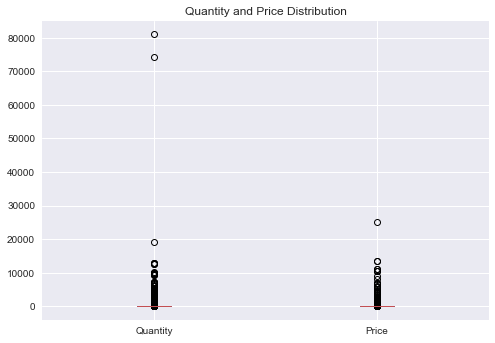

In [82]:
#boxplot of quantity
#sns.boxplot(df_new.Quantity)
df_new[['Quantity','Price']].boxplot()
plt.title('Quantity and Price Distribution');

>Looks like the quantity and price have many outliers. I cannot remove them now because I am going to be clustering after. 

<a id='description'></a>
### Description

In [152]:
#Are there any missing descriptions
df_new[df_new.Description.isna()].shape

(1693, 9)

___
>Look at capitalization of description

In [153]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037629 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1037629 non-null  object        
 1   StockCode    1037629 non-null  object        
 2   Description  1035936 non-null  object        
 3   Quantity     1037629 non-null  int64         
 4   InvoiceDate  1037629 non-null  datetime64[ns]
 5   Price        1037629 non-null  float64       
 6   Customer ID  798835 non-null   float64       
 7   Country      1037629 non-null  object        
 8   Date         1037629 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.2+ MB


In [83]:
#strip white spaces from discount and stockcode. I used astype to avoid getting nans in case there are entries that are int
df_new['Description'] = df_new['Description'].astype(str).str.strip()
df_new['StockCode'] = df_new['StockCode'].astype(str).str.strip()

print(df_new[df_fixed.Description.str.isupper()==True].shape)
df_new[df_new.Description.str.isupper()==True].tail()


(1038278, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2011-12-09


>Upper case description seems to be product description. What about lower case description

In [84]:
#first 100 unique stockcodes
df_new.StockCode.unique()[:100]

array(['85048', '79323P', '79323W', '22041', '21232', '22064', '21871',
       '21523', '22350', '22349', '22195', '22353', '48173C', '21755',
       '21754', '84879', '22119', '22142', '22296', '22295', '22109',
       '22107', '22194', '35004B', '82582', '21181', '21756', '21333',
       '84596F', '84596L', '22111', '22143', '22145', '22130', '21364',
       '21360', '21351', '21352', '35400', '20695', '37370', '10002',
       '84507B', '20703', '21987', '21989', '84970S', '20971', '22271',
       '22272', '22274', '21912', '22112', '21329', '21252', '21100',
       '21033', '20711', '21410', '21411', '84031A', '84031B', '84032A',
       '84032B', '84519A', '84519B', '85132A', '85132C', '85183A',
       '85183B', '22065', '22138', '22139', '22352', '85014A', '85014B',
       '16161P', '16169N', '21491', '22333', '85216', '21493', '21731',
       '85232B', '84691', '20749', 'POST', '22321', '84029E', '21955',
       '84899E', '85123A', '21582', '21586', '21590', '22091', '84251J',
   

In [156]:
#lets look at the description that is not upper case
print(df_new[df_new.Description.str.isupper()==False].shape)
df_new[df_new.Description.str.isupper()==False].head(10)


(6028, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
361,489517,21705,BAG 500g SWIRLY MARBLES,1,2009-12-01 11:34:00,1.65,16329.0,United Kingdom,2009-12-01
618,489526,46000S,POLYESTER FILLER PAD 40x40cm,2,2009-12-01 11:50:00,1.45,12533.0,Germany,2009-12-01
619,489526,20964,POLYESTER FILLER PAD 60x40cm,3,2009-12-01 11:50:00,2.55,12533.0,Germany,2009-12-01
1898,489597,20739,*USB Office Glitter Lamp,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom,2009-12-01
2052,489597,21704,BAG 250g SWIRLY MARBLES,1,2009-12-01 14:28:00,1.70,NaN,United Kingdom,2009-12-01
2664,489607,21596,Hypochondriac Pill Stress Ball,1,2009-12-01 14:49:00,4.30,NaN,United Kingdom,2009-12-01
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom,2009-12-01
2710,489609,21596,Hypochondriac Pill Stress Ball,1,2009-12-01 14:50:00,4.30,NaN,United Kingdom,2009-12-01
2844,489617,46000P,POLYESTER FILLER PAD 65CMx65CM,2,2009-12-01 14:59:00,4.25,13442.0,United Kingdom,2009-12-01
2845,489617,46000M,POLYESTER FILLER PAD 45x45cm,4,2009-12-01 14:59:00,1.55,13442.0,United Kingdom,2009-12-01


In [157]:
#stockcode M means manual
print(df_new[df_new.StockCode == 'M']['Description'].unique())
print('number of manuals sold: ', df_new[df_new.StockCode == 'M'].shape)
df_new[df_new.StockCode == 'M'].head()

['Manual']
number of manuals sold:  (803, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom,2009-12-01
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom,2009-12-04
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.0,United Kingdom,2009-12-04
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.00,17231.0,United Kingdom,2009-12-07
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295.0,United Kingdom,2009-12-08


In [158]:
#look at the lower case unique descriptions
df_new[df_new.Description.str.isupper()==False]['Description'].unique()


array(['BAG 500g SWIRLY MARBLES', 'POLYESTER FILLER PAD 40x40cm',
       'POLYESTER FILLER PAD 60x40cm', '*USB Office Glitter Lamp',
       'BAG 250g SWIRLY MARBLES', 'Hypochondriac Pill Stress Ball',
       'Manual', 'POLYESTER FILLER PAD 65CMx65CM',
       'POLYESTER FILLER PAD 45x45cm', 'nan', 'BAG 125g SWIRLY MARBLES',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'FOLK ART GREETING CARD,pack/12', '*USB Office Mirror Ball',
       "Dad's Cab Electronic Meter", 'POLYESTER FILLER PAD 30CMx30CM',
       'Bank Charges', "Dr. Jam's Arouzer Stress Ball",
       'This is a test product.', 'Electronic Talking Breath-A-Loser',
       'Dotcomgiftshop Gift Voucher £80.00',
       'Dotcomgiftshop Gift Voucher £20.00',
       'Dotcomgiftshop Gift Voucher £10.00',
       'Glow In The Dark Shot Glasses',
       'Dotcomgiftshop Gift Voucher £50.00',
       'Dotcomgiftshop Gift Voucher £30.00', '?',
       'POLYESTER FILLER PAD 45x30cm',
       'Adjustment by john on 26/01/2010 16',
       '

In [85]:
#There are bank charges and commisions which are not sales. Look also for fee and postage
search = ['charges','commission','postage','amazon fee','manual']
df_new[df_new.Description.str.contains('(?i)|'.join(search))==True]['Description'].unique()#?i to ignore case of str



array(['POSTAGE', 'DOTCOM POSTAGE', 'Manual', 'Bank Charges',
       'AMAZON FEE'], dtype=object)

>Amazon fee, postage, bank charges and DOTCOM POSTAGE are not sales so they need to be deleted. Also Manual is not a product so it does not make sense to include it in sales.

In [86]:
#how many rows have these descriptions
df_new[df_new.Description.str.contains('(?i)|'.join(search))==True].shape

(4254, 9)

In [87]:
#These are not sales so they can be deleted

searchFor = df_new[df_new.Description.str.contains('(?i)|'.join(search))==True]['Description'].index#?i to ignore case of str

df_new = df_new.drop(searchFor)


In [88]:
#making sure they were deleted
df_new[df_new.Description.str.contains('(?i)|'.join(search))==True]['Description'].shape

(0,)

___

[Back To Top](#top)

<a id='stockcode'></a>
### StockCode

In [163]:
#reset how many rows I see
pd.reset_option('display.max_rows')


>Check StockCodes. It seems that if the code has many letters instead of mostly numbers, it indicates some weird entry. But first check most common stockcodes

In [164]:
# number of unique stockcodes 
df_new.StockCode.nunique()

4973

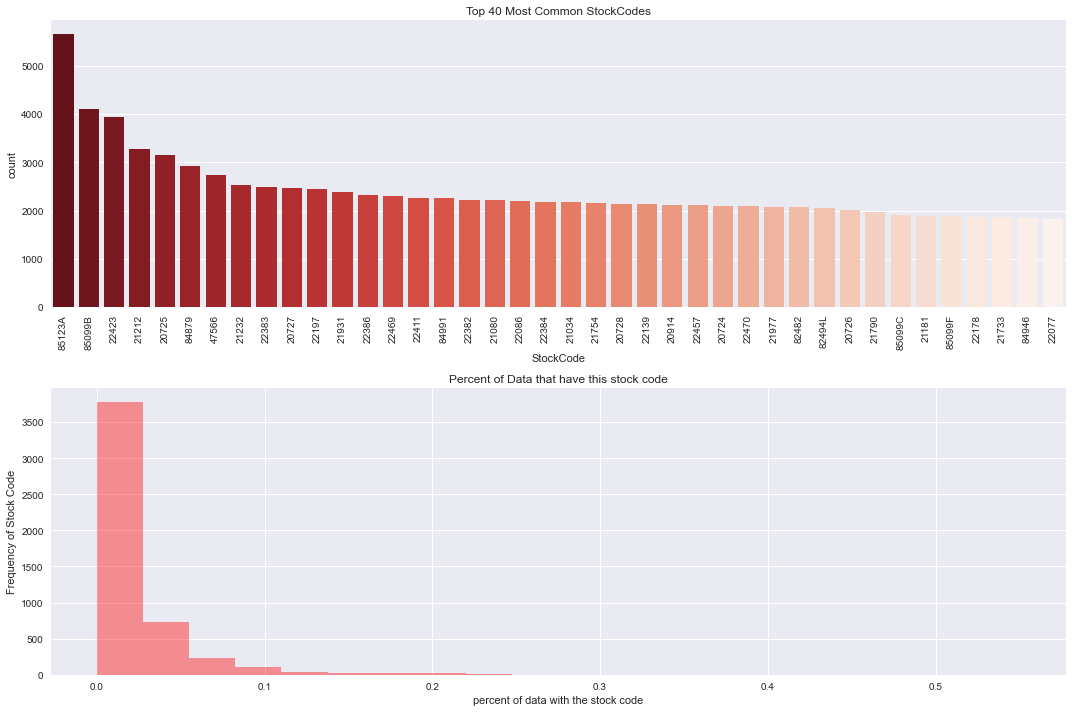

In [165]:
#plot most common stockcodes
f,ax = plt.subplots(2,1,figsize=(15,10))
common_stockcodes = df_new.groupby('StockCode')['Description'].count().sort_values(ascending=False)
sns.barplot(common_stockcodes.index[:40],common_stockcodes.values[:40],ax=ax[0],palette = 'Reds_r')
ax[0].tick_params(axis='x', rotation= 90)
ax[0].set_title('Top 40 Most Common StockCodes')
ax[0].set_ylabel('count')

percent_stockcode = df_new.groupby('StockCode')['Description'].count().sort_values(ascending=False)/df_new.shape[0]
percent_stockcode=round(percent_stockcode*100,2)
sns.distplot(percent_stockcode,bins=20,ax=ax[1],color='red',kde=False)
#sns.barplot(percent_stockcode.index[:40],percent_stockcode.values[:40],ax=ax[1],palette = 'Purples_r')
#ax[1].tick_params(axis='x', rotation= 90)
ax[1].set_title('Percent of Data that have this stock code')
ax[1].set_ylabel('Frequency of Stock Code')
ax[1].set_xlabel('percent of data with the stock code')

plt.tight_layout()

>- Most stockcodes are not very frequent, meaning that the seller sells many types of products and that there are no specialty products. But this could be misleading because the same product could have different stock code like for example if it has a different color, so I need to see if there are stock codes that differ only by a letter that could represent the same product.
>- So I will count the number of digits and letters in stock codes and see if there is a pattern.

<AxesSubplot:xlabel='length_stockCodes', ylabel='count'>

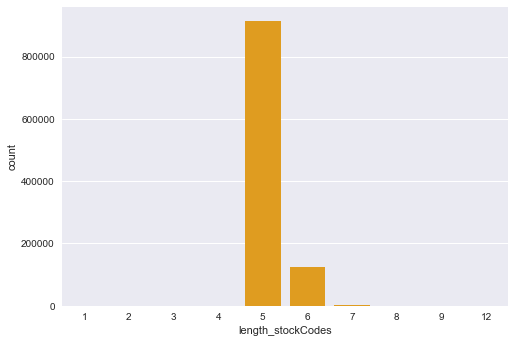

In [89]:
#count number of digits and letters, create a column with length to make it easier
df_new['length_stockCodes']=df_new.StockCode.apply(lambda x: len(x))

sns.countplot(df_new['length_stockCodes'],color='orange')

>Most stock codes are 5 characters long, but there are a few that are longer

In [90]:
#count number of digits
def count_digits_letters(code):
    digits = sum(c.isdigit() for c in code)
    letters = sum([c.isalpha() for c in code]) 
    return digits, letters

In [91]:
df_new['digit_number'],df_new['letter_number'] = zip(*df_new.StockCode.apply(count_digits_letters))

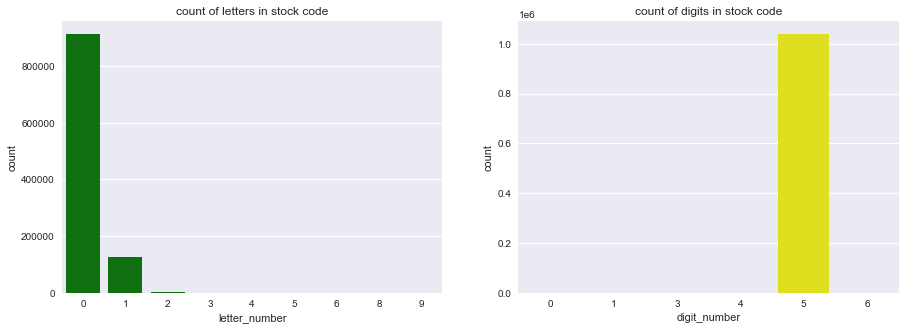

In [92]:
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_new.letter_number,color='green',ax=ax[0])
ax[0].set_title('count of letters in stock code')
sns.countplot(df_new.digit_number,color='yellow',ax=ax[1])
ax[1].set_title('count of digits in stock code');

>Most stock codes have 5 digits, but some also have letters. I will look at the ones with up to 9 letters

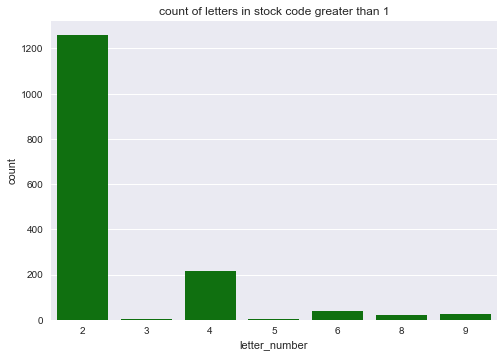

In [93]:
sns.countplot(df_new.letter_number[df_new.letter_number>1],color='green')
plt.title('count of letters in stock code greater than 1');

In [94]:
#look at stock codes with 2 letters
df_new.loc[df_new.letter_number==2].groupby('StockCode')['Description'].unique()

StockCode
15056BL    [EDWARDIAN PARASOL BLACK, nan]
15056bl         [EDWARDIAN PARASOL BLACK]
79323GR             [GREEN CHERRY LIGHTS]
79323LP        [LIGHT PINK CHERRY LIGHTS]
SP1002           [KID'S CHALKBOARD/EASEL]
Name: Description, dtype: object

>These look like products

In [95]:
#look at description of stock code that have more than one letter
print(df_new.StockCode.loc[df_new.letter_number>2].nunique())
#only 21 unique codes, lets look at their description
df_new.loc[df_new.letter_number>2].groupby('StockCode')['Description'].unique()

32


StockCode
ADJUST          [Adjustment by john on 26/01/2010 16, Adjustme...
ADJUST2                      [Adjustment by Peter on Jun 25 2010]
DCGS0003                                    [BOXED GLASS ASHTRAY]
DCGS0004                             [HAYNES CAMPER SHOULDER BAG]
DCGS0037                                     [KEY-RING CORKSCREW]
DCGS0041                       [HAYNES MINI-COOPER PLAYING CARDS]
DCGS0044                                [HANDZ-OFF CAR FRESHENER]
DCGS0058                                  [MISO PRETTY  GUM, nan]
DCGS0062                                [ROAD-RAGE CAR FRESHENER]
DCGS0066N                          [NAVY CUDDLES DOG HOODIE, nan]
DCGS0068                                      [DOGS NIGHT COLLAR]
DCGS0069                                  [OOH LA LA DOGS COLLAR]
DCGS0070                                  [CAMOUFLAGE DOG COLLAR]
DCGS0072                                 [CAT CAMOUFLAGUE COLLAR]
DCGS0075                                   [CAMOUFLAGUE DOG LEAD]


>- Gift vouchers are fine
>- test products are weird
>- adjust is also weird

In [173]:
#look at Adjust
df_new.loc[df_new.StockCode == 'ADJUST']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,length_stockCodes,digit_number,letter_number
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE,2010-01-26,6,0,6
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.0,EIRE,2010-01-26,6,0,6
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.0,EIRE,2010-01-26,6,0,6
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.0,EIRE,2010-01-26,6,0,6
70980,495736,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:23:00,21.00,12606.0,Spain,2010-01-26,6,0,6
70985,495742,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:25:00,63.24,12404.0,Finland,2010-01-26,6,0,6
71022,495745,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,56.73,12466.0,France,2010-01-26,6,0,6
71023,495748,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,117.72,16291.0,Portugal,2010-01-26,6,0,6
71033,495747,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,129.23,12555.0,Spain,2010-01-26,6,0,6
71034,495750,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:27:00,132.79,14156.0,EIRE,2010-01-26,6,0,6


In [174]:
#look at test
df_new[df_new.StockCode.str.contains ('TEST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,length_stockCodes,digit_number,letter_number
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom,2009-12-14,7,3,4
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom,2009-12-14,7,3,4
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom,2009-12-14,7,3,4
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom,2009-12-18,7,3,4
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom,2009-12-18,7,3,4
44614,493294,TEST002,nan,1,2009-12-22 15:15:00,0.0,NaN,United Kingdom,2009-12-22,7,3,4
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0,United Kingdom,2010-01-04,7,3,4
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0,United Kingdom,2010-01-04,7,3,4
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0,United Kingdom,2010-01-14,7,3,4
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0,United Kingdom,2010-01-22,7,3,4


In [176]:
print(df_new[df_new.StockCode.str.contains ('(?i)gift')].shape)
df_new[df_new.StockCode.str.contains ('(?i)gift')]

(99, 12)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,length_stockCodes,digit_number,letter_number
30620,491968,gift_0001_80,nan,2,2009-12-14 17:56:00,0.00,NaN,United Kingdom,2009-12-14,12,6,4
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,NaN,United Kingdom,2009-12-14,12,6,4
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,NaN,United Kingdom,2009-12-14,12,6,4
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom,2009-12-18,12,6,4
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,NaN,United Kingdom,2009-12-18,12,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
842962,564761,gift_0001_30,nan,30,2011-08-30 10:48:00,0.00,NaN,United Kingdom,2011-08-30,12,6,4
845901,564974,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,2,2011-08-31 15:32:00,8.33,NaN,United Kingdom,2011-08-31,12,6,4
847625,565231,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-09-02 09:26:00,25.00,NaN,United Kingdom,2011-09-02,12,6,4
956810,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,NaN,United Kingdom,2011-10-31,12,6,4


> Adjust and test stock codes need to be deleted. It is interesting to see that for all gift vouchers sold the customer id is nan, which hints at the fact that these customers are guests that do not hava an account

In [96]:
#delete adjust and test stock codes
idx = (df_new[df_new.StockCode.str.contains ('TEST')].index).append(df_new.loc[df_new.StockCode == 'ADJUST'].index)
df_new = df_new.drop(idx)


___

<a id = 'description'></a>
### Description

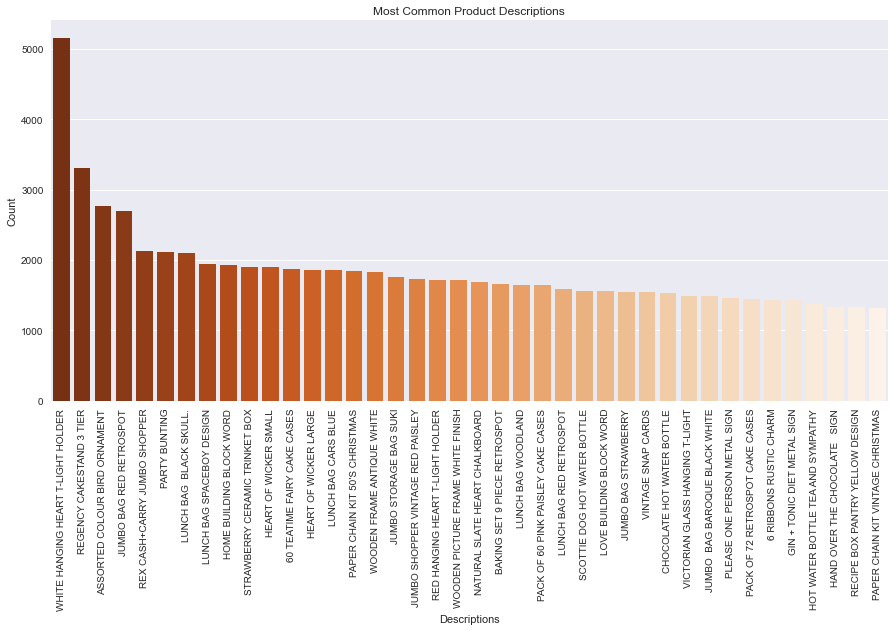

In [178]:
#First plot most common description
common_descriptions = df_new[df_new['Customer ID'].notna()]['Description'].value_counts().sort_values(ascending=False).iloc[0:40]
plt.subplots(figsize=(15,7))
sns.barplot(common_descriptions.index,common_descriptions.values,palette='Oranges_r')
plt.xlabel('Descriptions')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Most Common Product Descriptions');


___

[Back To Top](#top)

<a id = 'customers'></a>
### Customers

In [97]:
#number of unique customers
print('number of unique customers: ',df_new['Customer ID'].nunique())
#any popular customers
common_customers = df_new.groupby('Customer ID')['Customer ID'].count().sort_values(ascending=False).iloc[:40]


number of unique customers:  5854


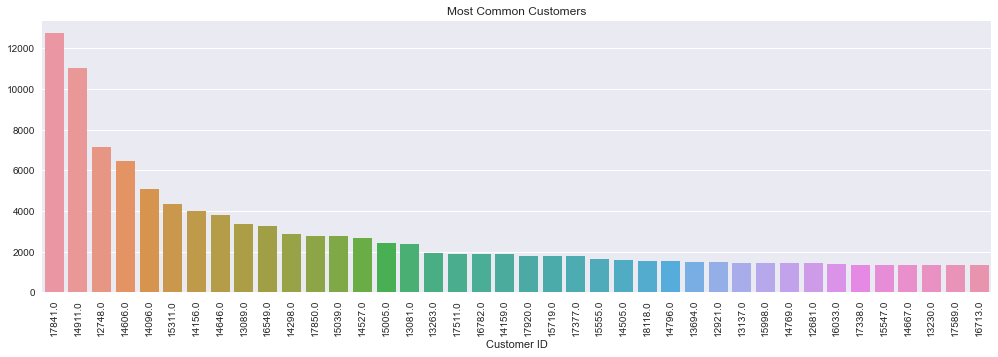

In [180]:
#plot the top 40 most common customers
plt.figure(figsize=(17,5))

sns.barplot(common_customers.index,common_customers.values,order=common_customers.index)
plt.xticks(rotation=90)
plt.title('Most Common Customers');

>I still have many customers ids that are missing which I think are guests.

<a id="missing_customerid"></a>
### Customers with nans

In [99]:
#number of customers with no id
df_new['Customer ID'].isna().sum()

237137

In [100]:
#percentage of customer with nans for id
df_new['Customer ID'].isna().sum()/df_new['Customer ID'].notna().sum() *100
#df_new['Customer ID'].describe()

29.53233853150912

>30% of customers have no ID, I am guessing that these are customers who have no account and have ordered as guests

In [102]:
df_new[df_new['Customer ID'].isna()]['letter_number'].value_counts()

0    200003
1     36712
4       186
2       184
9        24
8        22
5         4
3         2
Name: letter_number, dtype: int64

In [107]:
#create a dataframe with missing cutomers
df_nan_cusotmers = df_new[df_new['Customer ID'].isna()] 
df_nan_cusotmers.shape


(237137, 12)

In [197]:
#do these customers belong to a specific country
df_nan_cusotmers.Country.value_counts()

United Kingdom          234281
EIRE                      1603
Hong Kong                  351
Unspecified                231
France                     128
Switzerland                125
Portugal                   116
United Arab Emirates        82
Bahrain                     65
Israel                      47
RSA                         44
Bermuda                     34
Sweden                      18
Lebanon                     12
Name: Country, dtype: int64

>They are not connected in any one country, but are spread out. So I will replace nans with 1 to indicate guest and change customer id type to int

>I think the best solution right now is to take out the customer with no ID and put them in a separate dataframe, since I an doing customer segmentation.

In [108]:
#first save dataframe with all values
data_path = '../cleaned_data'
df_new.to_csv(data_path+'/data_with_all_customers.csv')
#save the dataframe with nan customers
df_nan_cusotmers.to_csv(data_path + '/nan_customers.csv')

In [216]:
print('before droping nans: ' , df_new.shape)

before droping nans:  (1033464, 12)


In [218]:

df_new.dropna(subset=['Customer ID'],inplace=True)
print('after dropping nans: ',df_new.shape)

after dropping nans:  (796327, 12)


In [219]:
df_new['Customer ID'] = df_new['Customer ID'].astype('int')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796327 entries, 0 to 1067369
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            796327 non-null  object        
 1   StockCode          796327 non-null  object        
 2   Description        796327 non-null  object        
 3   Quantity           796327 non-null  int64         
 4   InvoiceDate        796327 non-null  datetime64[ns]
 5   Price              796327 non-null  float64       
 6   Customer ID        796327 non-null  int64         
 7   Country            796327 non-null  object        
 8   Date               796327 non-null  datetime64[ns]
 9   length_stockCodes  796327 non-null  int64         
 10  digit_number       796327 non-null  int64         
 11  letter_number      796327 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 79.0+ MB


___

<a id="feature_engineering"></a>
### Feature Engineering

>I do not need the length of the stock code anymore so I will delete.

In [220]:
df_new.drop(['length_stockCodes','digit_number','letter_number'],axis=1,inplace=True)


In [221]:
#create a revenue column
df_new['Revenue'] = df_new['Quantity']*df_new['Price']

df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01,30.0


In [223]:
#see the customer that generates most revenue
customers_by_sum_revenue = df_new.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).iloc[:40]
customers_by_sum_revenue.shape

(40,)

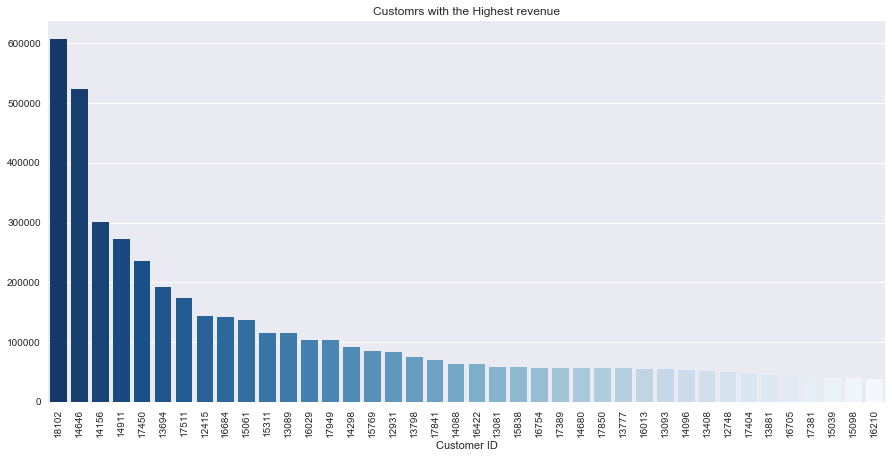

In [224]:
#plot the customer that generates the highest revenue
plt.figure(figsize=(15,7))
sns.barplot(customers_by_sum_revenue.index,customers_by_sum_revenue.values,\
            order=customers_by_sum_revenue.index,palette='Blues_r')
plt.xticks(rotation=90)
plt.title('Customrs with the Highest revenue');

>Create new features for day, month, year, quarter, week, day of week and day of year

In [225]:
#create new features
df_new['Year'] = df_new.Date.dt.year
df_new['Month'] = df_new.Date.dt.month
df_new['Day'] = df_new.Date.dt.day
df_new['Quarter'] = df_new.Date.dt.quarter
df_new['Week'] = df_new.Date.dt.week
df_new['Week_day'] = df_new.Date.dt.weekday
df_new['Day_of_year'] = df_new.Date.dt.dayofyear

In [226]:
df_new.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Revenue,Year,Month,Day,Quarter,Week,Week_day,Day_of_year
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09,10.20,2011,12,9,4,49,4,343
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09,12.60,2011,12,9,4,49,4,343
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09,16.60,2011,12,9,4,49,4,343
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09,16.60,2011,12,9,4,49,4,343
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-09,14.85,2011,12,9,4,49,4,343


In [231]:
#last thing is to drop duplicates
df_new.drop_duplicates(inplace=True)

In [232]:
df_new.shape

(770448, 17)

[Back To Top](#top)

<a id='save_file'></a>
### Save Dataframe

In [233]:
#same the new dataframe to a csv file
df_new.to_csv(data_path + '/clean_sales_df.csv')

In [234]:
print(os.listdir('../cleaned_data'))

['rfm_data.csv', 'clean_sales_df.csv', 'data_with_all_customers.csv', 'rfm_data.pkl', 'clean_sales_df.json']


<a id=summary></a>
### Summary:
- Read data from an excel file with two sheets, the first with sale information for year 2010 and second for 2011
- There were negative values for price and quantity
- Negative prices were deleted
- Negative quantity were returned damaged item so the dataframe was searched for identical rows that were positive quantity and were deleted. Then the rest of the negative quantities were deleted because they are not sales
_ Nan customers were separated in a different dataframe 
- Features added were revenue that is calculated from price * quantity
- Other features created were year, month, week, day, day of week day of year and quarter
- The dataframe was saved as an csv file

[Back to Menu](#top)